<a href="https://colab.research.google.com/github/KeyurPanchal07/Online-Payment-Fraud-Detection/blob/main/Online_Payment_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ONLINE PAYMENT FRAUD DETECTION


In [ ]:
## libraries for data analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


## Import Data

In [ ]:
data = pd.read_csv('Online Payment Fraud Detection.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [ ]:
features = data.columns[:-1].tolist()

In [ ]:
features

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest']

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


## Fraud cases and non Fraud cases

In [ ]:
## number of fraud cases

fraud_cases=len(data[data['isFraud']==1])

print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 1142


In [ ]:
## number of non-fraud cases

non_fraud_cases=len(data[data['isFraud']==0])

print(' Number of non-Fraud Cases:', non_fraud_cases)

 Number of non-Fraud Cases: 1047433


In [ ]:
## NULL VALUES

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
## DESCRIPTIVE STATISTICS

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [ ]:
## INFORMATION

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [ ]:
data.shape

(1048575, 10)

In [ ]:
data.size

10485750

In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
## check the data types

data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

## Explorative Data Analysis


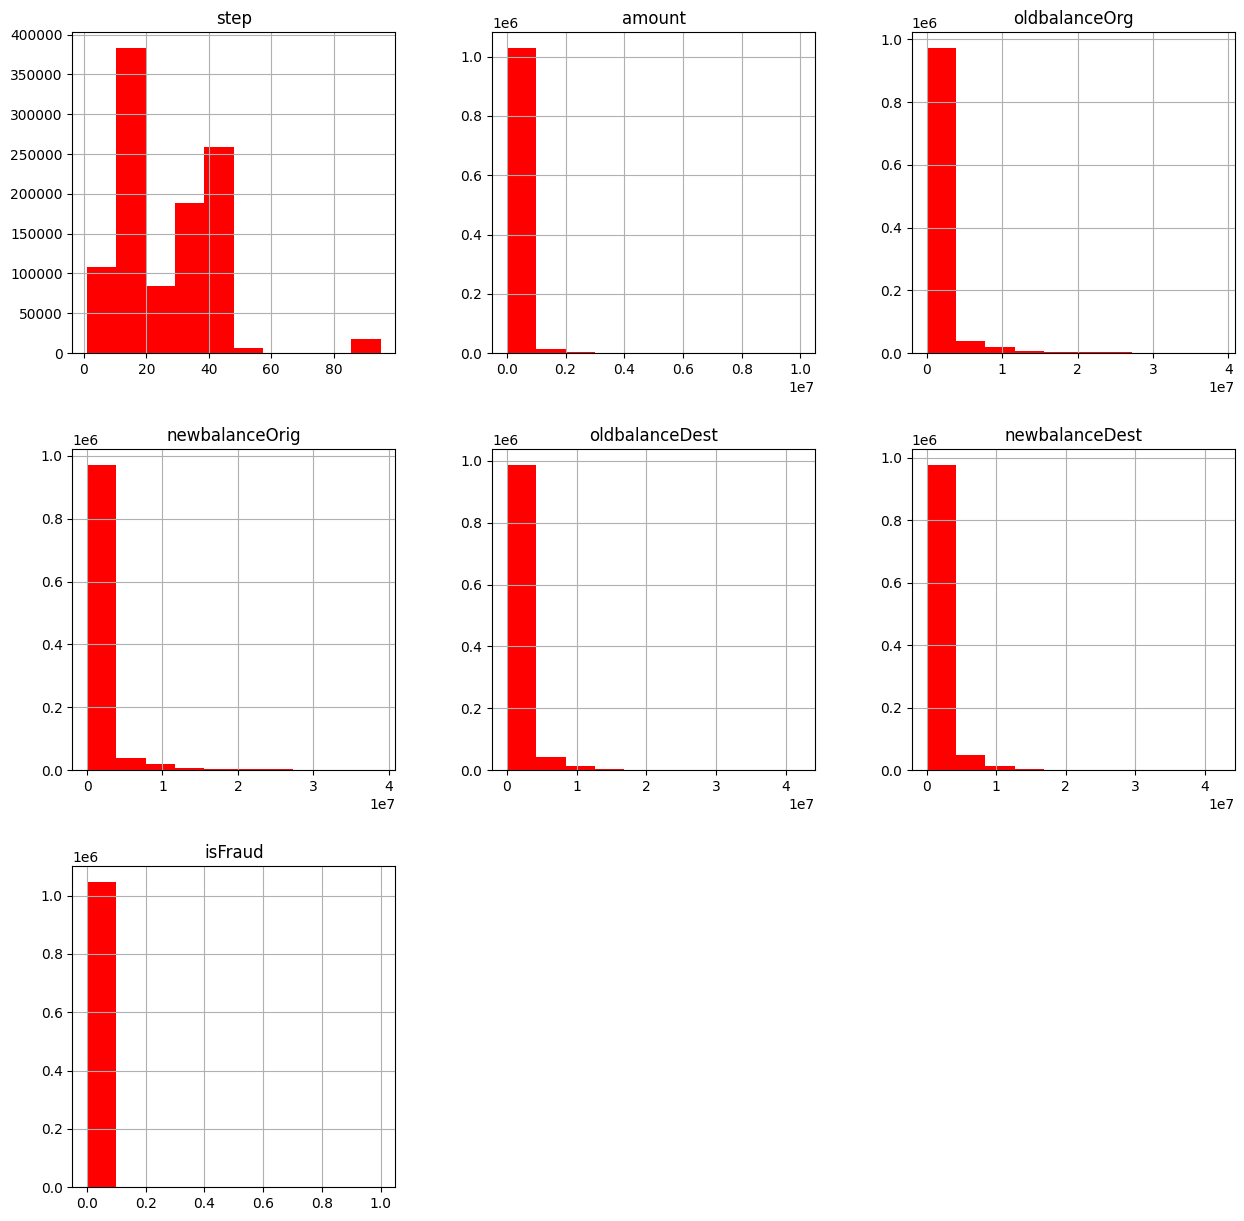

In [ ]:
##  Univariate analysis
data.hist(figsize=(15,15),color='red')
plt.show()

<Axes: >

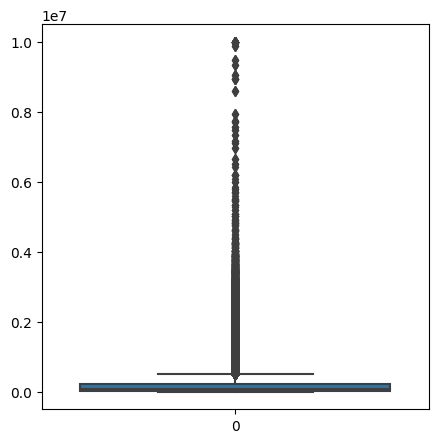

In [ ]:
## check for outliers
sns.boxplot(data['amount'])


<Axes: >

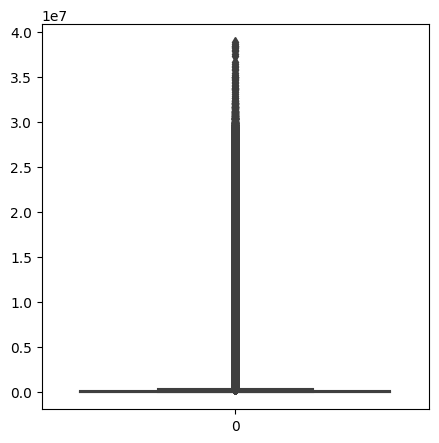

In [ ]:

sns.boxplot(data['oldbalanceOrg'])

<Axes: >

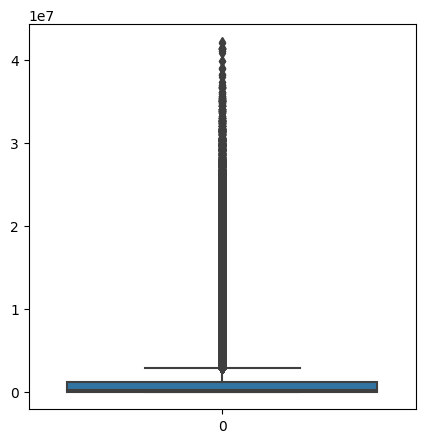

In [ ]:

sns.boxplot(data['newbalanceDest'])

<Axes: >

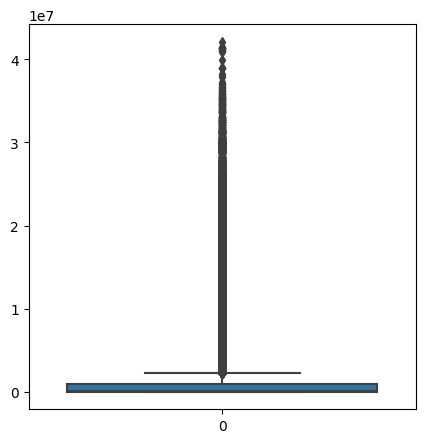

In [ ]:

sns.boxplot(data['oldbalanceDest'])

<Axes: >

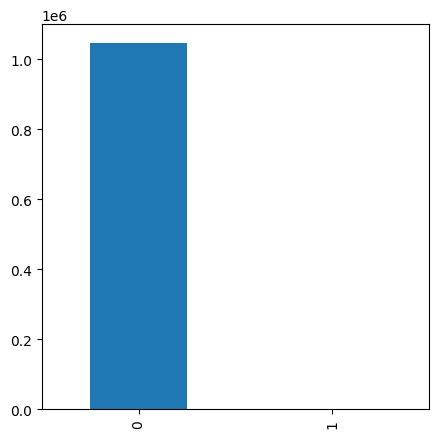

In [ ]:
data['isFraud'].value_counts().plot(kind='bar')

<Figure size 1000x1000 with 0 Axes>

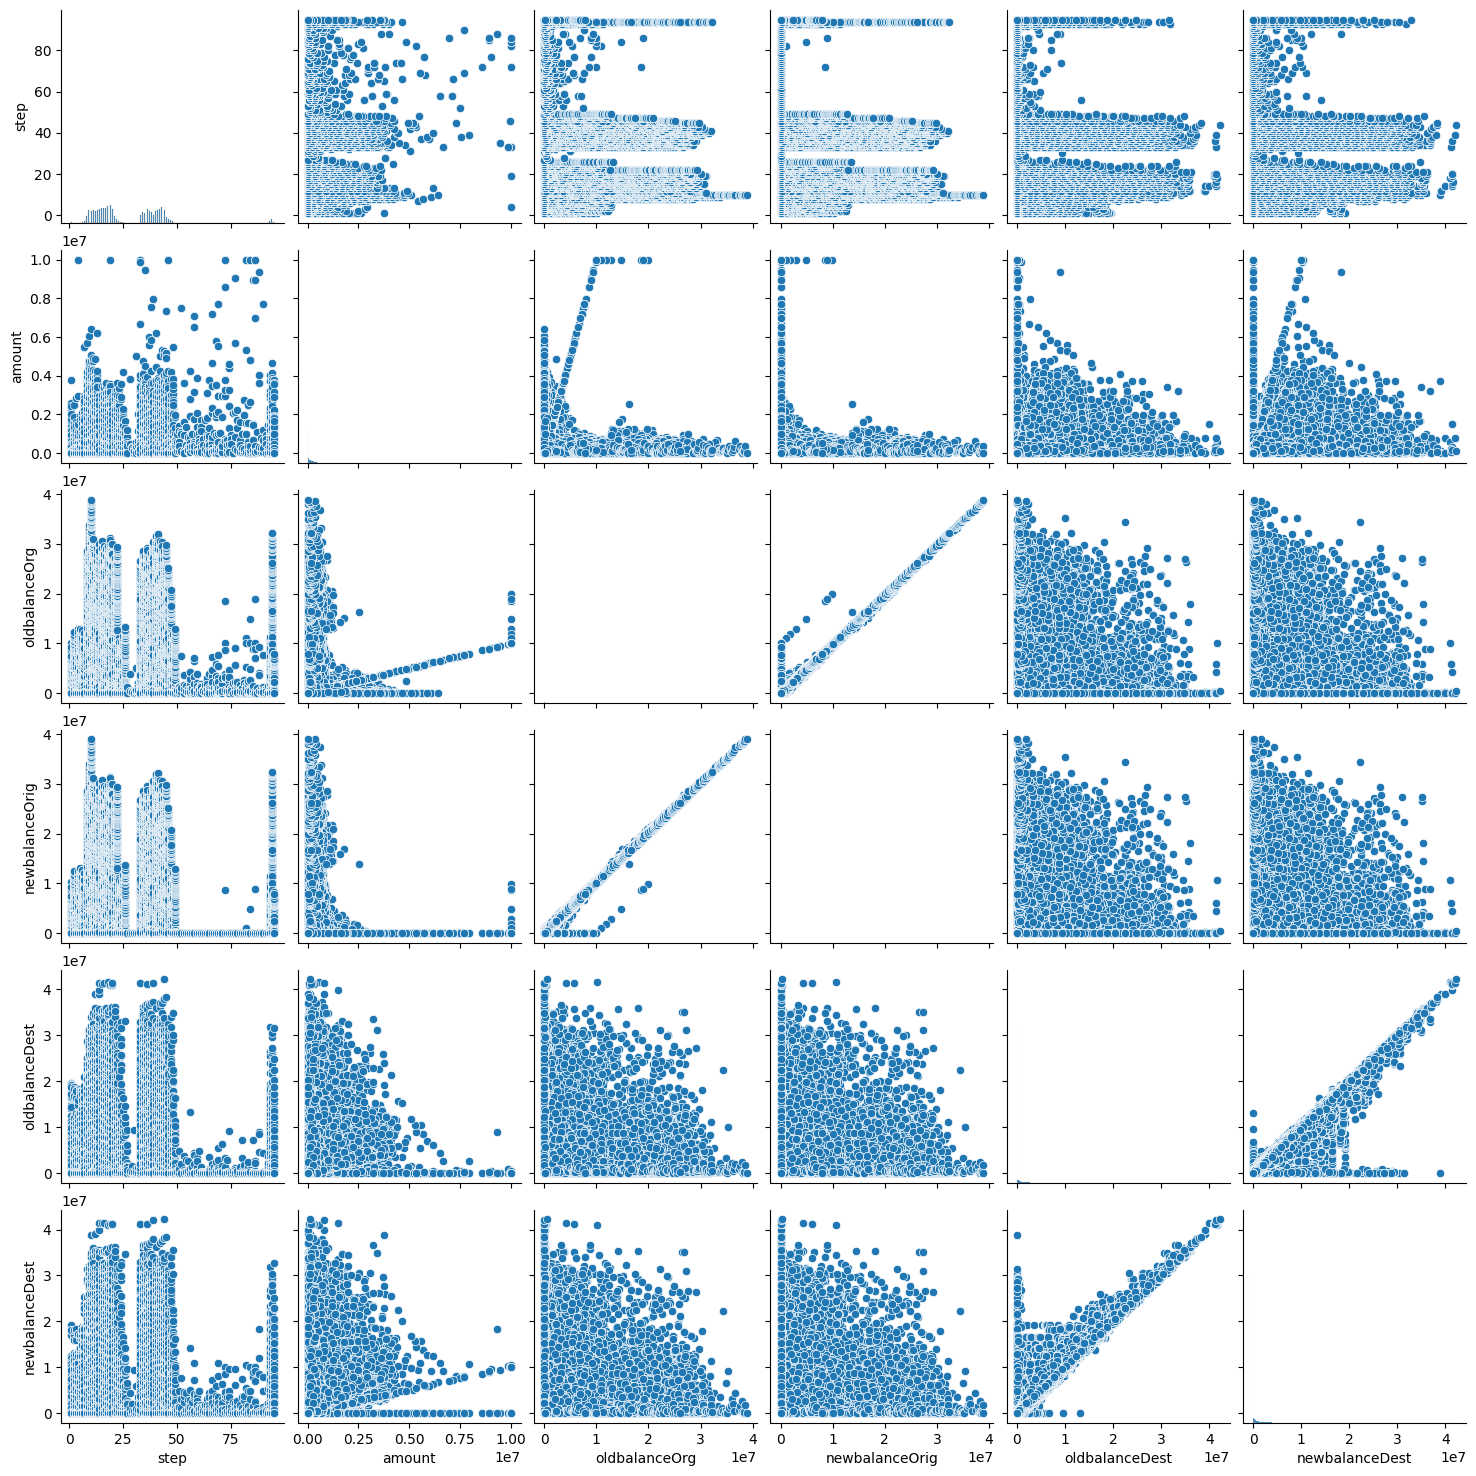

In [ ]:
# Lets check out the pairplot
plt.figure(figsize=(10,10))
sns.pairplot(data[features])
plt.show()

<ipython-input-113-cd4c713cf71c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data[features].corr(),cbar=True, fmt='.2f', xticklabels= features, annot_kws={'size': 15},


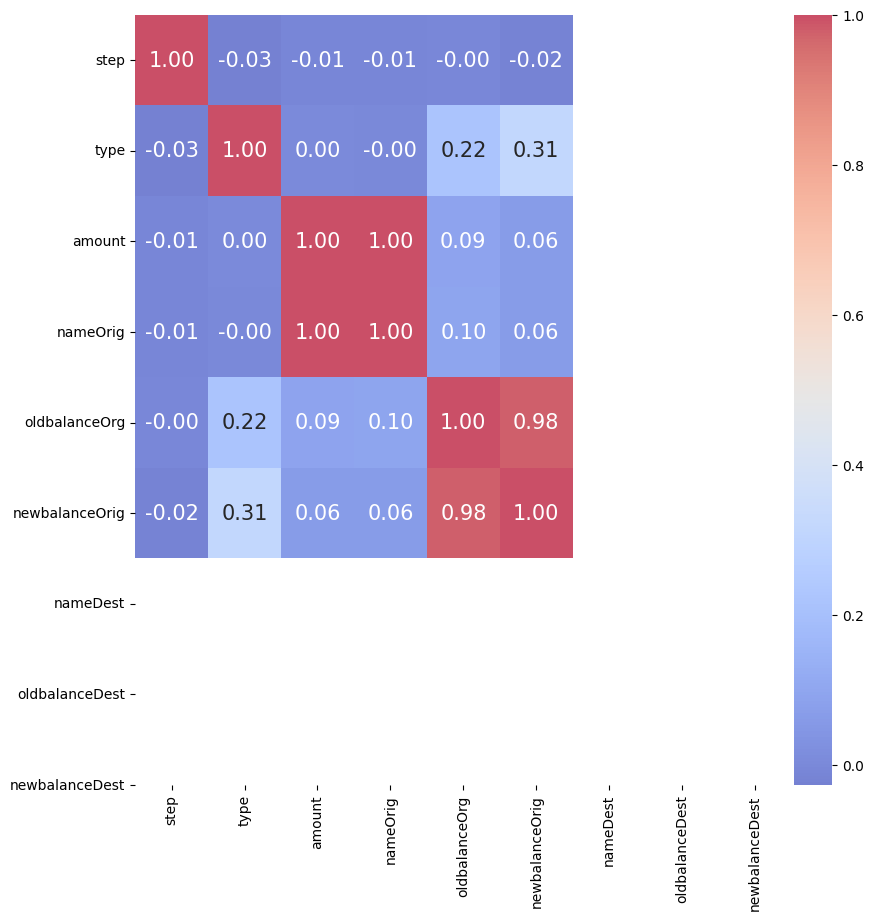

In [ ]:
## exploring correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data[features].corr(),cbar=True, fmt='.2f', xticklabels= features, annot_kws={'size': 15},
            yticklabels=features, alpha=0.7, cmap='coolwarm', annot=True)
plt.show()


In [ ]:
data['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

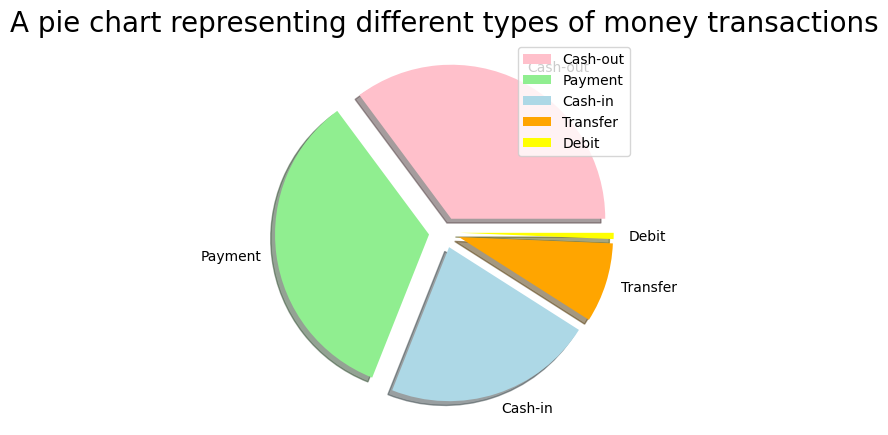

In [ ]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
# checking the different types of steps involved in transactions

x = data['step'].value_counts().nunique()

print("The no. of different steps involved in transactions are :", x)

The no. of different steps involved in transactions are : 58


<ipython-input-117-1038c5c68036>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.step, fit = norm, kde = False)


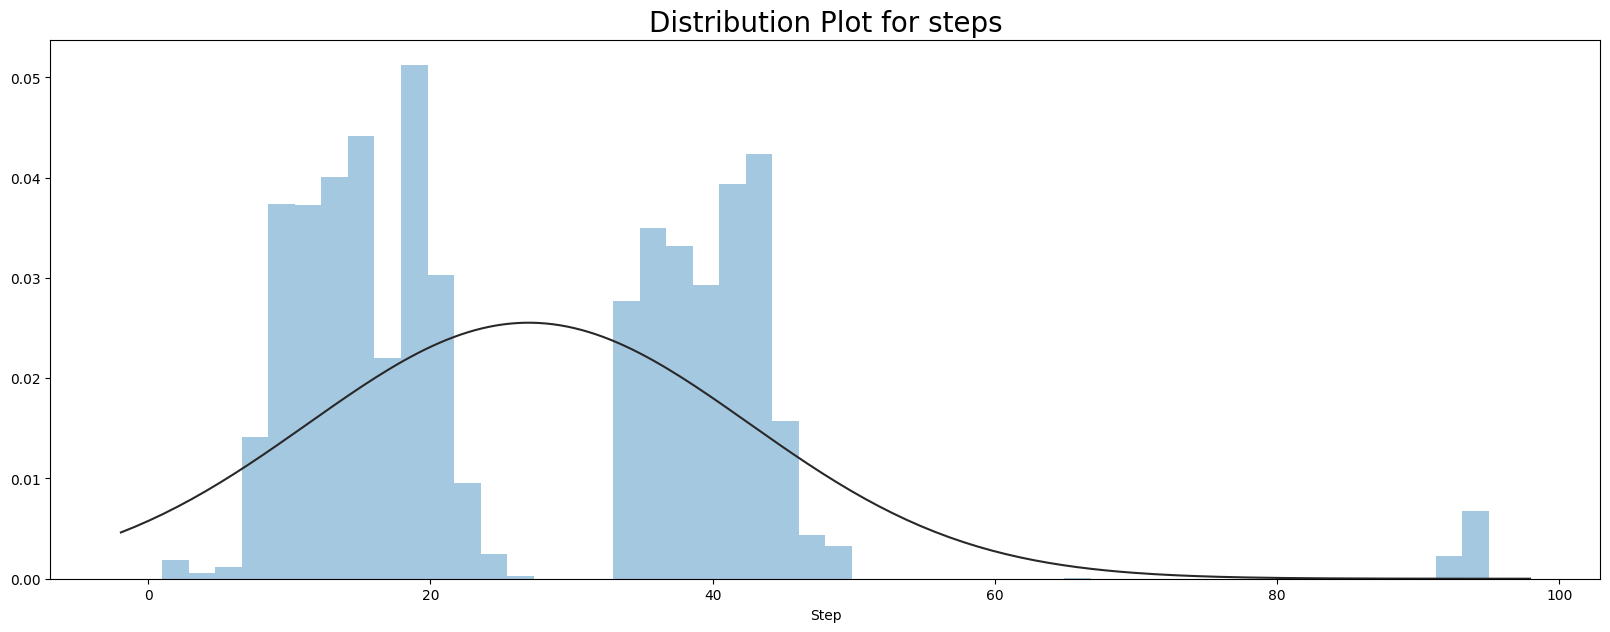

In [ ]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(20, 7)

# importing norm
from scipy.stats import norm

sns.distplot(data.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

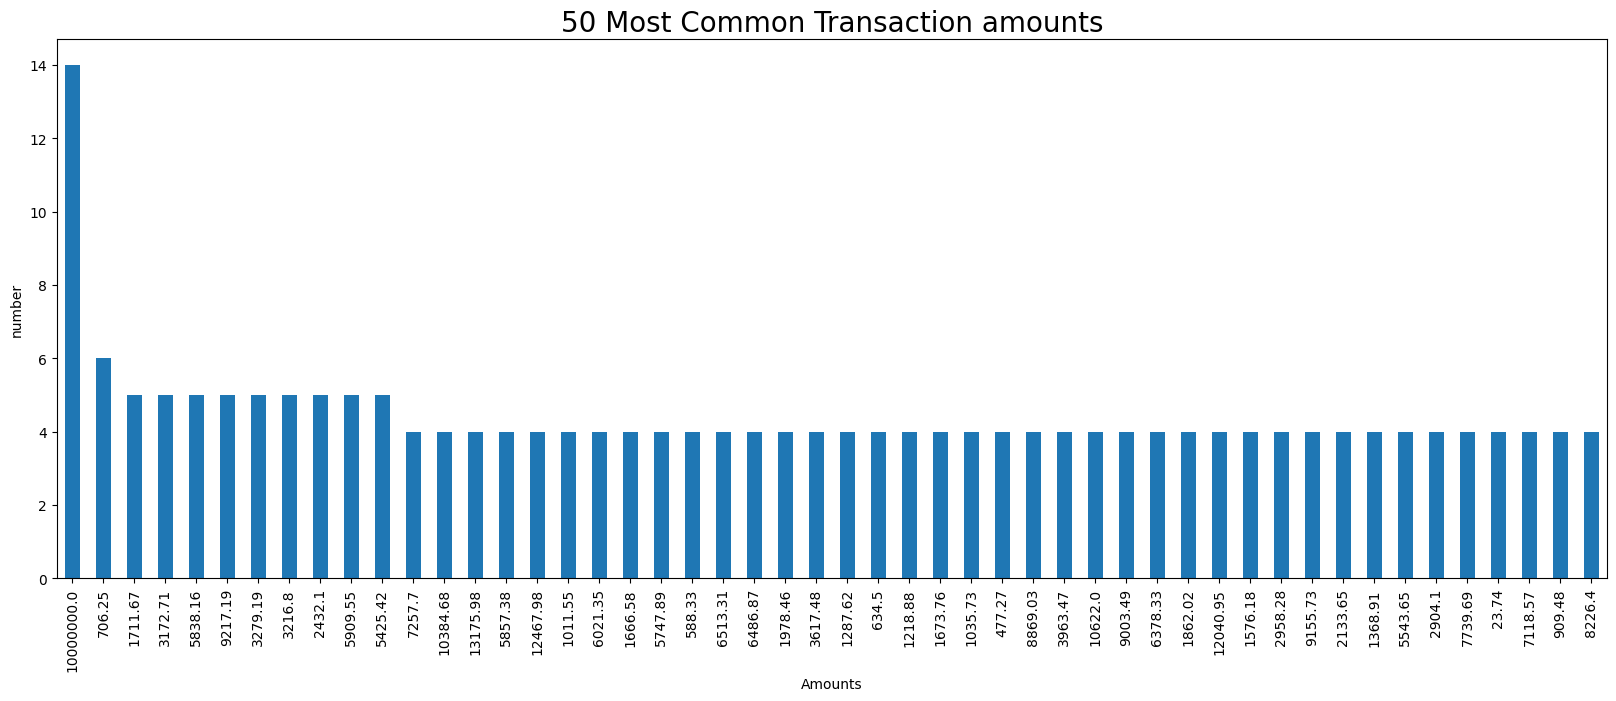

In [ ]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (20, 7)

data['amount'].value_counts().head(50).plot.bar()
plt.title('50 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('number')
plt.show()

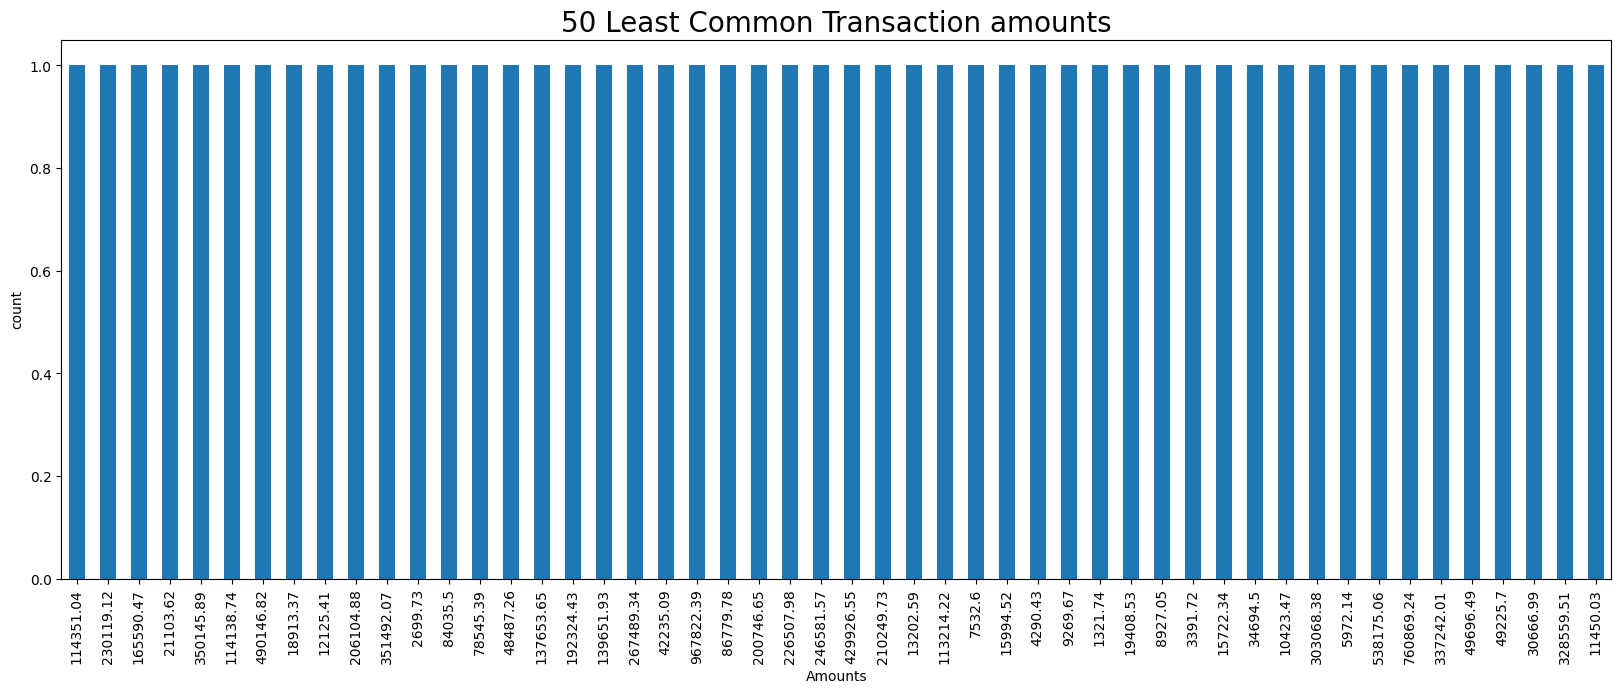

In [ ]:
##checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (20, 7)

data['amount'].value_counts().tail(50).plot.bar()
plt.title('50 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

In [ ]:
# finding  out the types of fraudulent transaction types out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)) )

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [ ]:
# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]


print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 564
The number of fraudulent CASH_OUTs = 578


In [ ]:
# finding out the minimum and maximum transaction from Transfer and cash out  when it is  Fraud

print("Transfer Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 119.0
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 119.0
Maximum Transaction : 10000000.0


In [ ]:
# defining a dataset containing only transfer type of transactions

dataTRANSFER = data[data['type'] == 'TRANSFER']

dataTRANSFER = pd.DataFrame(dataTRANSFER)

dataTRANSFER.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0


In [ ]:
# defining a dataset containing only cash_Out type of transactions

dataCASH_OUT = data.loc[data['type'] == 'CASH_OUT']

dataCASH_OUT = pd.DataFrame(dataCASH_OUT)

dataCASH_OUT.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0


In [ ]:
data['nameDest'].value_counts().head()

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
Name: nameDest, dtype: int64

In [ ]:
# making dependent and independent sets

X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]


X.shape

(460394, 10)

In [ ]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0


In [ ]:
# removing unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)



In [ ]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [ ]:
# label encoding for the transaction type

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
X['type']=label.fit_transform(X['type'])
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,1,181.00,181.0,0.0,0.0,0.00,1
3,1,0,181.00,181.0,0.0,21182.0,0.00,1
15,1,0,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,1,215310.30,705.0,0.0,22425.0,0.00,0
24,1,1,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [ ]:
X['isFraud'].value_counts()


0    459252
1      1142
Name: isFraud, dtype: int64

In [ ]:
# making our independent & dependent  set

Y = X['isFraud']

X = X.drop(['isFraud'], axis = 1)


In [ ]:

Y.head(), X.head()

(2     1
 3     1
 15    0
 19    0
 24    0
 Name: isFraud, dtype: int64,
     step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
 2      1     1     181.00          181.0             0.0             0.0   
 3      1     0     181.00          181.0             0.0         21182.0   
 15     1     0  229133.94        15325.0             0.0          5083.0   
 19     1     1  215310.30          705.0             0.0         22425.0   
 24     1     1  311685.89        10835.0             0.0          6267.0   
 
     newbalanceDest  
 2             0.00  
 3             0.00  
 15        51513.44  
 19            0.00  
 24      2719172.89  )

In [ ]:
# split the dataset into train and tests

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

# checking the new shapes
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (345295, 7)
x_test:  (115099, 7)
y_train:  (345295,)
y_test:  (115099,)


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score


In [ ]:
#  scaling on the data using standard scaler

sc = StandardScaler()

x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))

In [ ]:
x_train

,0,1,2,3,4,5,6
0,0.888981,-0.481892,0.007437,-0.008798,-0.158831,-0.550921,-0.549231
1,1.090500,-0.481892,-0.048649,-0.259744,-0.158831,-0.305596,-0.322906
2,-0.521652,-0.481892,0.057295,-0.208613,-0.158831,0.089738,0.068143
3,0.553116,2.075156,1.015120,-0.259744,-0.158831,0.275318,0.360368
4,1.224846,-0.481892,-0.676138,-0.259744,-0.158831,-0.505442,-0.590172
...,...,...,...,...,...,...,...
345290,0.418770,-0.481892,-0.468417,-0.259744,-0.158831,-0.015939,-0.099220
345291,0.956154,-0.481892,-0.455186,-0.163322,-0.158831,-0.451544,-0.511723
345292,-0.790344,-0.481892,-0.288926,-0.259744,-0.158831,0.150771,0.081374
345293,-0.723171,-0.481892,-0.305928,-0.259744,-0.158831,-0.278611,-0.328934


In [ ]:
x_test

,0,1,2,3,4,5,6
0,0.485943,-0.481892,-0.426986,-0.259744,-0.158831,2.583857,2.377516
1,-0.588825,-0.481892,-0.569087,-0.209211,-0.158831,-0.550921,-0.620227
2,-0.521652,-0.481892,-0.368621,-0.259744,-0.158831,0.355179,0.265892
3,-1.059036,-0.481892,0.687008,-0.164067,-0.158831,-0.550921,-0.412039
4,-1.193382,-0.481892,-0.355808,-0.259744,-0.158831,-0.000269,-0.111143
...,...,...,...,...,...,...,...
115094,0.485943,-0.481892,-0.620397,-0.166153,-0.158831,-0.550921,-0.626545
115095,1.090500,-0.481892,-0.549051,-0.047691,-0.158831,-0.550921,-0.617760
115096,1.090500,-0.481892,-0.325493,-0.259744,-0.158831,1.871568,1.712839
115097,-0.857517,-0.481892,-0.048494,-0.259744,-0.158831,-0.273822,-0.180006


## Using Random Forest Classifier model

In [ ]:
## using Random forest classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [ ]:
rfc = rfc.fit(x_train, y_train)



In [ ]:
y_pred=rfc.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
##  accuracy score

Train_accuracy = rfc.score(x_train, y_train)
Train_accuracy

0.9999015334713796

In [ ]:
Test_accuracy = rfc.score(x_test, y_test)
Test_accuracy

0.9994265805958349

In [ ]:
pd.DataFrame({'actual_Result': y_test, 'predicted_Result': y_pred})

,actual_Result,predicted_Result
626102,0,0
418782,0,0
458039,0,0
111964,0,0
66622,0,0
...,...,...
626430,0,0
937329,0,0
939877,0,0
256586,0,0


[[114817      4]
 [    63    215]]


<Axes: >

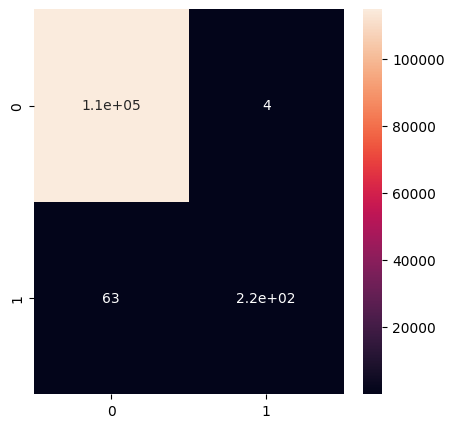

In [ ]:
## confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114821
           1       0.98      0.77      0.87       278

    accuracy                           1.00    115099
   macro avg       0.99      0.89      0.93    115099
weighted avg       1.00      1.00      1.00    115099



## Modelling using Logistic Regression

In [ ]:
## Using Loistic Regression

from sklearn.linear_model import LogisticRegression

LogisticRegr = LogisticRegression()
LogisticRegr.fit(x_train, y_train)

LogisticRegression()

In [ ]:

train_accuracy = LogisticRegr.score(x_train,y_train)
train_accuracy

0.9984013669471032

In [ ]:
test_accuracy = LogisticRegr.score(x_test,y_test)
test_accuracy

0.9983666235154085

In [ ]:
Y_pred=(LogisticRegr.fit(x_train, y_train)).predict(x_test)
confusion_matrix(y_test,y_pred)

array([[114817,      4],
       [    63,    215]])

In [ ]:
## classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114821
           1       0.98      0.77      0.87       278

    accuracy                           1.00    115099
   macro avg       0.99      0.89      0.93    115099
weighted avg       1.00      1.00      1.00    115099



## Modelling Using Decision Tree Classifier

In [ ]:
## Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
tree_model.score(x_train, y_train)

1.0

In [ ]:
## check accuracy score

tree_model.score(x_test, y_test)

0.9990008601291063